In [21]:
import numpy as np

import matplotlib.pyplot as plt

# Micromotion
Trapped ions, to first order, under go harmonic motion $E = \frac{1}{2}\hbar \left(\omega_x^2 x^2 + \omega_y^2 y^2 +\omega_z^2 z^2 \right)$. To second order, there are additional small harmonic oscillations on top of this motion oscillating with a characteristic distance $r_{\mu} = \frac{q}{2}\cos (\Omega t)$ where $q = (2 Q V_0) / (m d_0^2 \Omega^2)$ is the Mathieu parameter.

Assuming the ion is at position (0,0,0), let's consider a Doppler cooling beam on the ion. If the ion is experiencing micromotion, the velocity of that motion is $ \dot{r}_{\mu} = \frac{q \Omega}{2}\sin (\Omega t)$
Let's consider only the micromotion $r_{\mu}$ under

### Doppler Shift

In [55]:
c = 299792458  # meters / second
v = 11  # meteres / second

def doppler_shift_factor(velocity):
    beta = velocity / c
    return np.sqrt((1+beta)/(1-beta))

doppler_shift_factor(v)

1.0000000366920512

### Scattering Rate

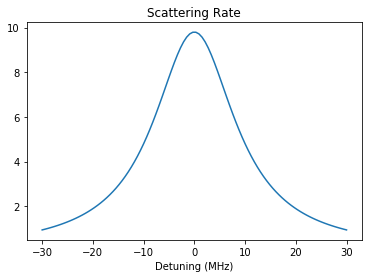

In [64]:
gamma = 19.6  # Mhz
s = 1  # saturation intensity s = I / I_s
deltas = np.linspace(-30,30,100)

def scattering_rate(delta, gamma=19.6, s=1):
    return (gamma/2)**3 / (delta**2 + (gamma/2)**2) * s

plt.plot(deltas, scattering_rate(deltas))
plt.title("Scattering Rate")
plt.xlabel("Detuning (MHz)")
plt.show()

### Scattering off a moving ion

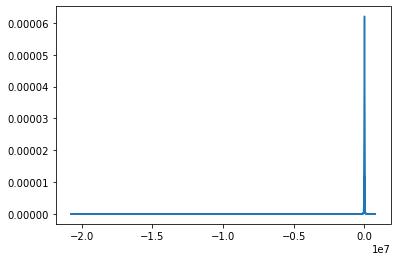

In [90]:
trap_freq = 21107790 * 2 * np.pi
q = 0.1
fudge = 1.2e-6  # fudge factor
laser_detuning = -10000000  # -10 MHz
ts = np.arange(1000) * 1e-10

velocities = fudge * q * trap_freq /2 * np.sin(trap_freq * ts)
np.min(velocities), np.max(velocities)

# Compute the doppler shift form these velocities
doppler_shifts = doppler_shift_factor(velocities)

# Compute frequency delta based on doppler_shift
c = 299792458  # meters / second
lamb_source = 405644370000000  # Hz
freq_shift = lamb_source*doppler_shifts - lamb_source

# Including laser detuning
freq_shift += laser_detuning

# Compute scattering rate over doppler_shift range
sc_rates = scattering_rate(freq_shift)

plt.plot(freq_shift, sc_rates)
plt.show()